In [1]:
import sqlalchemy
from sqlalchemy.sql import func
from sqlalchemy import create_engine, inspect
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
import pymysql
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore', category=pymysql.Warning)
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
import numpy as np
import datetime as dt

In [2]:
#create database called 'hawaii.sqlite
engine = create_engine("sqlite:///database/hawaii.sqlite")

In [3]:
#use create engine to connect to sqlite db
Base.metadata.create_all(engine)
session = Session(bind=engine)

In [4]:
# Use the Base class to reflect the database tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [5]:
engine.execute('select * from w_measurement order by date desc limit 10').fetchall()

[('USC00519397', '2017-08-23', '0', '81'),
 ('USC00514830', '2017-08-23', '0', '82'),
 ('USC00519523', '2017-08-23', '0.08', '82'),
 ('USC00516128', '2017-08-23', '0.45', '76'),
 ('USC00519397', '2017-08-22', '0', '82'),
 ('USC00519523', '2017-08-22', '0', '82'),
 ('USC00516128', '2017-08-22', '0.5', '76'),
 ('USC00519397', '2017-08-21', '0', '81'),
 ('USC00514830', '2017-08-21', '0.02', '79'),
 ('USC00516128', '2017-08-21', '0.56', '76')]

In [6]:
engine.execute('select * from w_station limit 10').fetchall()

[('USC00519397', 'WAIKIKI 717.2, HI US', '21.2716', '-157.8168', '3'),
 ('USC00513117', 'KANEOHE 838.1, HI US', '21.4234', '-157.8015', '14.6'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', '21.5213', '-157.8374', '7'),
 ('USC00517948', 'PEARL CITY, HI US', '21.3934', '-157.9751', '11.9'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', '21.4992', '-158.0111', '306.6'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', '21.33556', '-157.71139', '19.5'),
 ('USC00519281', 'WAIHEE 837.5, HI US', '21.45167', '-157.84889', '32.9'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', '21.3152', '-157.9992', '0.9'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', '21.3331', '-157.8025', '152.4')]

In [7]:
#query to retrieve 12 months
weather_df = pd.read_sql_query('select w_measurement.station, date, prcp, tobs, w_station.name, \
latitude, longitude, elevation \
from w_measurement \
inner join w_station \
on w_measurement.station = w_station.station \
group by date \
having date between "2017-01-01" and "2018-01-01"', engine)
weather_df.head(10)

,station,date,prcp,tobs,name,latitude,longitude,elevation
0,USC00516128,2017-01-01,0.03,68,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
1,USC00516128,2017-01-02,0,70,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
2,USC00516128,2017-01-03,0,71,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
3,USC00516128,2017-01-04,0,70,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
4,USC00516128,2017-01-05,0.47,71,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
5,USC00516128,2017-01-06,0.1,65,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
6,USC00516128,2017-01-07,0,70,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
7,USC00516128,2017-01-08,0.03,66,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
8,USC00516128,2017-01-09,0,69,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
9,USC00516128,2017-01-10,0,64,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [8]:
#select date and prcp values
prcp_df = pd.DataFrame(weather_df, columns=['date', 'prcp'])
prcp_df['date'] = pd.to_datetime(prcp_df['date'], format='%Y/%m/%d')
prcp_df.set_index(prcp_df['date'])
prcp_df.reset_index()
prcp_df.prcp = prcp_df.prcp.astype(float)
prcp_df.head(2)

,date,prcp
0,2017-01-01,0.03
1,2017-01-02,0.00


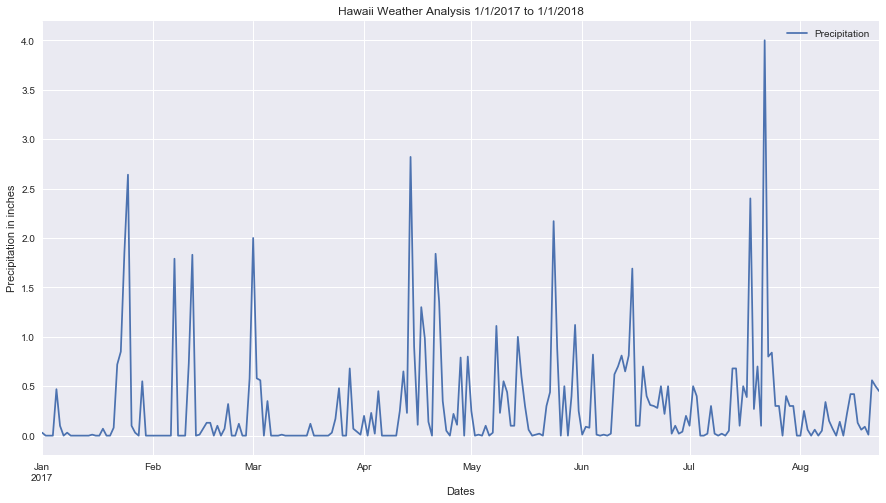

In [9]:
#Plot the precipitation dataframe
prcp_df.plot('date', 'prcp', figsize=(15, 8))
plt.xlabel("Dates")
plt.ylabel("Precipitation in inches")
plt.title("Hawaii Weather Analysis 1/1/2017 to 1/1/2018")
plt.legend(["Precipitation"])
plt.savefig("precipitation.png")
plt.show()

In [10]:
station_df = pd.read_sql_query('select name, count(distinct station) as "Number of Stations" from w_station \
group by station', engine)
station_df

,name,Number of Stations
0,"HONOLULU OBSERVATORY 702.2, HI US",1
1,"KANEOHE 838.1, HI US",1
2,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1
3,"MANOA LYON ARBO 785.2, HI US",1
4,"PEARL CITY, HI US",1
5,"UPPER WAHIAWA 874.3, HI US",1
6,"WAIHEE 837.5, HI US",1
7,"WAIKIKI 717.2, HI US",1
8,"WAIMANALO EXPERIMENTAL FARM, HI US",1


In [11]:
#total number of stations
print(f'Number of Stations: {len(station_df)}')

Number of Stations: 9


In [12]:
#most active stations in descending order
station_df = pd.read_sql_query('select w_measurement.station, w_station.name, count(date) as "Total Daily Activity" \
from w_measurement \
inner join w_station \
on w_measurement.station = w_station.station \
group by name order by "Total Daily Activity" desc', engine)
station_df.head(10)

,station,name,Total Daily Activity
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00513117,"KANEOHE 838.1, HI US",2696
2,USC00519397,"WAIKIKI 717.2, HI US",2685
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2572
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2484
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1937
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1932
7,USC00517948,"PEARL CITY, HI US",683
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",342


In [13]:
station_df.head(2)

,station,name,Total Daily Activity
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00513117,"KANEOHE 838.1, HI US",2696


In [14]:
#station with the highest number of observations in descending order
station_df = pd.read_sql_query('select w_measurement.station, w_station.name, sum(tobs) as "Total Observations" \
from w_measurement \
inner join w_station \
on w_measurement.station = w_station.station \
group by name order by "Total Observations" desc', engine)
station_df.head(10)

,station,name,Total Observations
0,USC00519397,"WAIKIKI 717.2, HI US",200205
1,USC00519281,"WAIHEE 837.5, HI US",198652
2,USC00513117,"KANEOHE 838.1, HI US",195940
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",191698
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",176029
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",144913
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",138191
7,USC00517948,"PEARL CITY, HI US",50943
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",24855


In [15]:
#12 months tobs data
tobs_df = pd.DataFrame(weather_df, columns=['date', 'tobs'])
tobs_df['date'] = pd.to_datetime(tobs_df['date'], format='%Y/%m/%d')
tobs_df.set_index(tobs_df['date'])
tobs_df.reset_index()
tobs_df.tobs = tobs_df.tobs.astype(float)
tobs_df.head(10)

,date,tobs
0,2017-01-01,68.0
1,2017-01-02,70.0
2,2017-01-03,71.0
3,2017-01-04,70.0
4,2017-01-05,71.0
5,2017-01-06,65.0
6,2017-01-07,70.0
7,2017-01-08,66.0
8,2017-01-09,69.0
9,2017-01-10,64.0


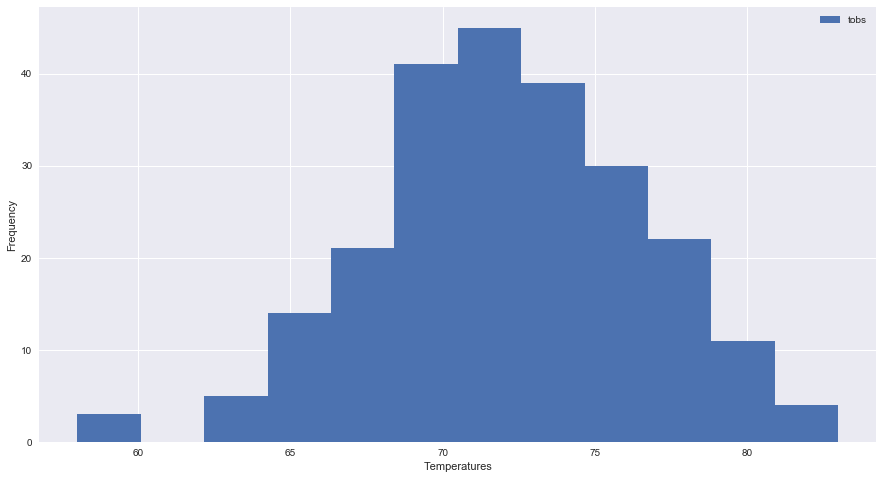

In [16]:
#plot a histogram with 12 bins
plt.figure(figsize=(15,8))
plt.hist(tobs_df['tobs'], bins=12, label = 'tobs')
plt.legend(loc='best')
plt.xlabel('Temperatures')
plt.ylabel('Frequency')
plt.show()

In [17]:
#all data
weather_df = pd.read_sql_query('select w_measurement.station, date, prcp, tobs, w_station.name, \
latitude, longitude, elevation \
from w_measurement \
inner join w_station \
on w_measurement.station = w_station.station \
group by date \
having date between "2010-01-01" and "2018-01-01"', engine)
weather_df.head(10)

,station,date,prcp,tobs,name,latitude,longitude,elevation
0,USC00516128,2010-01-01,0.14,73,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
1,USC00516128,2010-01-02,0,61,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
2,USC00516128,2010-01-03,0,76,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
3,USC00516128,2010-01-04,0,72,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
4,USC00516128,2010-01-05,0,74,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
5,USC00516128,2010-01-06,0.36,71,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
6,USC00516128,2010-01-07,0.3,74,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
7,USC00516128,2010-01-08,0,64,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
8,USC00516128,2010-01-09,0,67,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
9,USC00516128,2010-01-10,0.01,71,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [18]:
weather_df['tobs'] = weather_df['tobs'].astype('float64')

In [19]:
weather_df['date'] = pd.to_datetime(weather_df['date'])

In [ ]:
#write a function that will return min, avg and max based on date range unput
def calc_temps(start_date, end_date):
    mask = (weather_df['date'] > start_date) & (weather_df['date'] < end_date)
    temp_df = weather_df.loc[mask]  
    
    min_temp = temp_df['tobs'].min()    
    avg_temp = temp_df['tobs'].mean()
    max_temp = temp_df['tobs'].max()
    
    temps = {
        'min temp': min_temp,
        'avg temp': avg_temp,
        'max temp': max_temp
    }
    return temps

In [ ]:
#pick your trip dates
start_date = input('Enter Start Date (YYYY-MM-DD): ')
end_date = input('Enter End Date (YYYY-MM-DD): ')
my_temps = calc_temps(start_date, end_date)
print(my_temps)

In [ ]:
temp_range = pd.DataFrame([my_temps])
temp_range

In [ ]:
yerror = my_temps['max temp']-my_temps['min temp']
avg_temp = '{:0,.2f}'.format(my_temps['avg temp'])
#yerr
#avg_temp
bar_temps = {'avg temp': avg_temp, 'yerror': yerror}
bar_temps

In [ ]:
bar_range = pd.DataFrame([bar_temps])
bar_range

In [ ]:
#bar chart with the y error bar
with plt.style.context('seaborn-darkgrid'):

    temp_mean = bar_range['avg temp'].astype(float)

    error = bar_range['yerror'].astype(float)

    #width = 50       

    fig = plt.figure(figsize=(3,8))
    ax = fig.add_subplot(111)
    p1 = plt.bar('Average Temperature', temp_mean, yerr=error)
    plt.ylabel('Temperature (F)')
    plt.title('Trip Avg Temp')
    plt.yticks(np.arange(0, 70, 10))

    plt.show()